**<h1 align="center" font="bold">New York City Taxi Fare Prediction</font></h1>**

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
* [Introduction : Taxi Fare Prediction](#Introduction-:-Taxi-Fare-Prediction)
  * [Objective](http://)
  * [Data Dictionary](#Data-Dictionary)   
* [Data Exploration](#Data-Exploration)
     * [Profile Report](#Profile-Report)
* [ Data Preprocessing](#Data-Preprocessing)
     * [Dropping Missing Values](#Dropping-Missing-Values)
     * [Handle Wrong data](#Handle-Wrong-data)
     * [Handle Outliers](#Handle-Outliers)
     * [Label Encoding](Label-Encoding)
* [Data Visualization](#Data-Visualization)
     * [Map Plots](http://)
*[Feature Engineering](#Feature-Engineering)
    * [Feature Extraction](#Feature-Extraction)
    * [Feature Selection](#Feature-Selection)
    * [Feature Scaling](#Feature-Scaling)

# Introduction : Taxi Fare Prediction

* **Objective** 

The objective of New York taxi fare prediction is to develop a model that accurately predicts the fare amount for taxi rides specifically in the context of New York City. The primary goal is to estimate the fare cost based on various input features related to New York taxi trips. 

*  **Data Dictionary**

The dataset contains several columns with information about taxi service.The detailed data dictionary is given below :

* 'User ID': A unique identifier for each user.
* 'User Name': The name of the user.
* 'Driver Name': The name of the taxi driver.
* 'Car Condition': The condition of the taxi car.
* 'Weather': Information about the weather conditions during the trip.
* 'Traffic Condition': Information about the traffic conditions during the trip.
* 'key': A unique identifier for each trip.
* 'fare_amount': The fare amount charged for the trip.
* 'pickup_datetime': The date and time when the trip started.
* 'pickup_longitude': The longitude coordinate of the pickup location.
* 'pickup_latitude': The latitude coordinate of the pickup location.
* 'dropoff_longitude': The longitude coordinate of the dropoff location.
* 'dropoff_latitude': The latitude coordinate of the dropoff location.
* 'passenger_count': The number of passengers in the taxi.
* 'hour': The hour of the day when the trip started.
* 'day': The day of the month when the trip started.
* 'month': The month when the trip started.
* 'weekday': The day of the week when the trip started.
* 'year': The year when the trip started.
* 'jfk_dist': The distance from the pickup location to John F. Kennedy International Airport.
* 'ewr_dist': The distance from the pickup location to Newark Liberty International Airport.
* 'lga_dist': The distance from the pickup location to LaGuardia Airport.
* 'sol_dist': The distance from the pickup location to Statue of Liberty.
* 'nyc_dist': The distance from the pickup location to the center of New York City.
* 'distance': The total distance of the trip.
* 'bearing' :  The direction of travel from the pickup point to the dropoff point.

In [ ]:
import numpy as np 
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import pandas_profiling
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
!conda install -y gdown


In [ ]:
# !pip install pandas_profiling

In [ ]:
!gdown --id 1OZUsd15F_4TVDwtdOPjUDIxVxLEKnJDM

In [ ]:
! unzip "/kaggle/working/final_internship_data.zip"

In [ ]:
data =pd.read_csv('/kaggle/working/final_internship_data.csv')

# Data Exploration

In [ ]:
data

# Profile Report

In [ ]:
# profile = ProfileReport(data)
# profile

In [ ]:
data.columns

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.info()

In [ ]:
# finding no of rows and no of columns in data set
print('number of rows:',data.shape[0])
print('number of columns:',data.shape[1])

In [ ]:
data.dtypes

In [ ]:
data.duplicated()

In [ ]:
data.duplicated().sum()

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    
    print("\033[92m" + f"Unique values in column '{column}':" + "\033[0m")
    
    print(unique_values)
    print()

# Data Preprocessing

* **Dropping Missing Values**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

In [ ]:
print('Old size: %d' % len(data))
data= data.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(data))

In [ ]:
data.isnull().sum().sort_values(ascending=False)

* **Handle Wrong data**

In [ ]:
data['fare_amount'].describe()

In [ ]:
from collections import Counter
Counter(data['fare_amount']<0)

In [ ]:
data = data.drop(data[data['fare_amount']<0].index, axis=0)
data.shape

In [ ]:
data['fare_amount'].describe()

In [ ]:
count_zero_passenger = len(data[data['passenger_count'] == 0])
count_zero_passenger

In [ ]:
dis=len(data[data['distance'] == 0])
dis

In [ ]:
data=data[data['distance'] > 0]

In [ ]:
year=len(data[data['year'] == 2009])
year

In [ ]:
fare=len(data[data['fare_amount'] == 0])
fare

In [ ]:
fare=len(data[data['fare_amount']  <3])
fare

In [ ]:
data=data[data['fare_amount'] > 3]

In [ ]:
# Replace passenger_count with 1 if it is 0
data['passenger_count'] = data['passenger_count'].replace(0, 1)

In [ ]:
count_zero_passenger = len(data[data['passenger_count'] == 0])
count_zero_passenger

In [ ]:
data['passenger_count'].describe()

In [ ]:
passenger_count = data.groupby('year')['passenger_count'].sum()
passenger_count

**Handle Outliers**

In [ ]:
# from scipy import stats

# z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))

# threshold = 3 
# outlier_mask = (z_scores > threshold).any(axis=1)
# outlier_indices = data.index[outlier_mask].tolist()

# fare_99th_percentile = data['fare_amount'].quantile(0.99)#99th percentile for fare

# data['fare_amount'] = data['fare_amount'].apply(lambda x: min(x, fare_99th_percentile))#capping

In [ ]:
original_data = data.copy()
features = ['fare_amount', 'distance','pickup_longitude','pickup_latitude','dropoff_latitude', 'dropoff_longitude','year'] 

for i in features:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    data = data[data[i] <= (Q3+(1.5*IQR))]
    data = data[data[i] >= (Q1-(1.5*IQR))]
    data = data.reset_index(drop=True)
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(original_data.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(data.shape[0]))

In [ ]:
Counter(data['pickup_longitude']>-math.radians(-75))
Counter(data['pickup_longitude']<-math.radians(-72))

In [ ]:
Counter(data['pickup_latitude']>-math.radians(40))
Counter(data['pickup_latitude']<-math.radians(42))

In [ ]:
Counter(data['dropoff_latitude']>-math.radians(40))
Counter(data['dropoff_latitude']<-math.radians(42))

In [ ]:
Counter(data['dropoff_longitude']>-math.radians(-75))
Counter(data['dropoff_longitude']<-math.radians(-72))

In [ ]:
import math
data = data.loc[data['pickup_latitude'].between(math.radians(40), math.radians(42))]
data = data.loc[data['pickup_longitude'].between(math.radians(-75), math.radians(-72))]
data = data.loc[data['dropoff_latitude'].between(math.radians(40), math.radians(42))]
data = data.loc[data['dropoff_longitude'].between(math.radians(-75), math.radians(-72))]

# Feature Extraction

In [ ]:
data['key'] = pd.to_datetime(data['key'])
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['minute'] = data['pickup_datetime'].dt.minute
data['second'] = data['pickup_datetime'].dt.second

In [ ]:
len(data[data['weekday']!=data['pickup_datetime'].dt.weekday])

In [ ]:
len(data[data['hour']!=data['pickup_datetime'].dt.hour])

In [ ]:
len(data[data['month']!=data['pickup_datetime'].dt.month])

In [ ]:
len(data[data['day']!=data['pickup_datetime'].dt.day])

In [ ]:
# # Absolute difference in latitude and longitude
# data['abs_lat_diff'] = (data['dropoff_latitude'] - data['pickup_latitude']).abs()
# data['abs_lon_diff'] = (data['dropoff_longitude'] - data['pickup_longitude']).abs()

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.



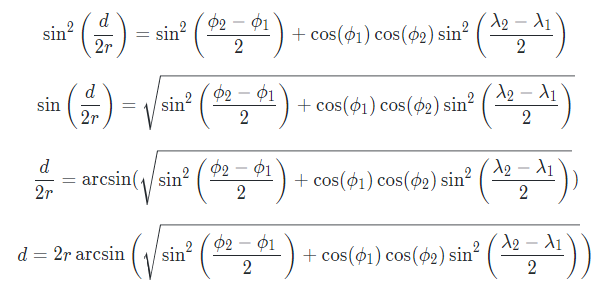

In [ ]:
# import math

# # Define airport coordinates in radians
# jfk_coord = (math.radians(40.639722), math.radians(-73.778889))
# ewr_coord = (math.radians(40.6925), math.radians(-74.168611))
# lga_coord = (math.radians(40.77725), math.radians(-73.872611))
# sol_coord = (math.radians(40.6892), math.radians(-74.0445))
# nyc_coord = (math.radians(40.7141667), math.radians(-74.0063889))

# # Calculate distances from pickup coordinates to each airport
# data['pickup_jfk_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['pickup_latitude']) * math.sin(jfk_coord[0]) +
#                           math.cos(row['pickup_latitude']) * math.cos(jfk_coord[0]) *
#                           math.cos(row['pickup_longitude'] - jfk_coord[1])),
#     axis=1
# )
# data['pickup_ewr_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['pickup_latitude']) * math.sin(ewr_coord[0]) +
#                           math.cos(row['pickup_latitude']) * math.cos(ewr_coord[0]) *
#                           math.cos(row['pickup_longitude'] - ewr_coord[1])),
#     axis=1
# )
# data['pickup_lga_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['pickup_latitude']) * math.sin(lga_coord[0]) +
#                           math.cos(row['pickup_latitude']) * math.cos(lga_coord[0]) *
#                           math.cos(row['pickup_longitude'] - lga_coord[1])),
#     axis=1
# )
# data['pickup_sol_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['pickup_latitude']) * math.sin(sol_coord[0]) +
#                           math.cos(row['pickup_latitude']) * math.cos(sol_coord[0]) *
#                           math.cos(row['pickup_longitude'] - sol_coord[1])),
#     axis=1
# )
# data['pickup_nyc_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['pickup_latitude']) * math.sin(nyc_coord[0]) +
#                           math.cos(row['pickup_latitude']) * math.cos(nyc_coord[0]) *
#                           math.cos(row['pickup_longitude'] - nyc_coord[1])),
#     axis=1
# )

# # Calculate distances from dropoff coordinates to each airport
# data['dropoff_jfk_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['dropoff_latitude']) * math.sin(jfk_coord[0]) +
#                           math.cos(row['dropoff_latitude']) * math.cos(jfk_coord[0]) *
#                           math.cos(row['dropoff_longitude'] - jfk_coord[1])),
#     axis=1
# )
# data['dropoff_ewr_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['dropoff_latitude']) * math.sin(ewr_coord[0]) +
#                           math.cos(row['dropoff_latitude']) * math.cos(ewr_coord[0]) *
#                           math.cos(row['dropoff_longitude'] - ewr_coord[1])),
#     axis=1
# )
# data['dropoff_lga_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['dropoff_latitude']) * math.sin(lga_coord[0]) +
#                           math.cos(row['dropoff_latitude']) * math.cos(lga_coord[0]) *
#                           math.cos(row['dropoff_longitude'] - lga_coord[1])),
#     axis=1
# )
# data['dropoff_sol_distance'] = data.apply(
#     lambda row: math.acos(math.sin(row['dropoff_latitude']) * math.sin(sol_coord[0]) +
#                           math.cos(row['dropoff_latitude']) * math.cos(sol_coord[0]) *
#                           math.cos(row['dropoff_longitude'] - sol_coord[1])),
#     axis=1
# )

In [ ]:
data[['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist','pickup_jfk_distance', 'pickup_ewr_distance',
       'pickup_lga_distance', 'pickup_sol_distance', 'pickup_nyc_distance',
       'dropoff_jfk_distance', 'dropoff_ewr_distance', 'dropoff_lga_distance',
       'dropoff_sol_distance']]

In [ ]:
bearings = data['bearing']
data['bearing_sin'] = np.sin(bearings)
data['bearing_cosine'] = np.cos(bearings)

<div class="alert alert-block alert-warning">  
we calculated the distance with the haversine formula ,Manhattan distance and Euclidean distance but it doesn't affect in the evaluation
</div>

In [ ]:
# import math
# def haversine_distance(lat1, lon1, lat2, lon2):

#     # Haversine formula
#     dlon = lon2 - lon1
#     dlat = lat2 - lat1
#     a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
#     c = 2 * math.asin(math.sqrt(a))
#     radius = 6371  
#     distance = radius * c

#     return distance

In [ ]:
# data['haversine'] = data.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [ ]:
# count = len(data[data['distance'] == data['haversine']])
# print(count)

Manhattan Distance: Sum of Absolute difference between the two points, across all dimensions.

Euclidean Distance: is the shortest distances between two points. It is the square root of sum of squares of distance between two points.

In [ ]:
# # Calculate Euclidean distance
# data['euclidean_distance'] = np.sqrt(np.power(data['pickup_latitude'] - data['dropoff_latitude'], 2) +
#                                      np.power(data['pickup_longitude'] - data['dropoff_longitude'], 2))

# # Calculate Manhattan distance
# data['manhattan_distance'] = np.abs(data['pickup_latitude'] - data['dropoff_latitude']) + \
#                               np.abs(data['pickup_longitude'] - data['dropoff_longitude'])

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.shape

In [ ]:
data

# Data Visualization

> * **Map Plots**

In [ ]:
df=data
sample_data = df.sample(n=1000, random_state=42)

**Visualizing Pickup locations in NewYork**

In [ ]:
import math
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()

df = [go.Scattermapbox(
            lat=sample_data['pickup_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample_data['pickup_longitude'].apply(lambda x: math.degrees(x)),
            mode='markers',
            marker=dict(
                size=4,
                color='gold',
                opacity=0.8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox=dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                               bearing=10,
                               pitch=60,
                               zoom=13,
                               center=dict(
                                   lat=40.721319,
                                   lon=-73.987130),
                               style="mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"),
                    width=900,
                    height=600, title="Pick up Locations in New York")

fig = dict(data=df, layout=layout)
offline.iplot(fig)

**Visualizing Dropoff locations in NewYork**

In [ ]:
 df = [go.Scattermapbox(
            lat=sample_data['dropoff_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample_data['dropoff_longitude'].apply(lambda x: math.degrees(x)),
            mode='markers',
            marker=dict(
                size= 4,
                color = 'cyan',
                opacity = .8,
            ),
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=600, title = "Drop off locations in Newyork")
fig = dict(data=df, layout=layout)
offline.iplot(fig)

**High fare locations**

In [ ]:
df2=data
sample = df2.sample(n=1000, random_state=42)
high_fares = sample[sample['fare_amount'] > sample.fare_amount.mean() + 3* sample.fare_amount.std()]
high_fares.head()

In [ ]:
df2 = [go.Scattermapbox(
            lat=sample['pickup_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample['pickup_longitude'].apply(lambda x: math.degrees(x)),
            customdata = high_fares['key'],
            mode='markers',
            marker=dict(
                size= 8,
                color = 'violet',
                opacity = .8),
            name ='high_fares_pick_up'
          ),
        go.Scattermapbox(
            lat=sample['dropoff_latitude'].apply(lambda x: math.degrees(x)),
            lon=sample['dropoff_longitude'].apply(lambda x: math.degrees(x)),
            customdata = high_fares['key'],
            mode='markers',
            marker=dict(
                size= 8,
                color = 'gold',
                opacity = .8),
            name ='high_fares_drop_off'
          )]
layout = go.Layout(autosize=False,
                   mapbox= dict(accesstoken="pk.eyJ1Ijoic2hhejEzIiwiYSI6ImNqYXA3NjhmeDR4d3Iyd2w5M2phM3E2djQifQ.yyxsAzT94VGYYEEOhxy87w",
                                bearing=10,
                                pitch=60,
                                zoom=13,
                                center= dict(
                                         lat=40.721319,
                                         lon=-73.987130),
                                style= "mapbox://styles/shaz13/cjk4wlc1s02bm2smsqd7qtjhs"),
                    width=900,
                    height=600, title = "High Fare Locations")
fig = dict(data=df2, layout=layout)
offline.iplot(fig)

In [ ]:
import folium

%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [ ]:
train=data
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

pickups = []
dropoffs = []
for index, row in train.iterrows():
    pickup = [math.degrees(row["pickup_latitude"]), math.degrees(row["pickup_longitude"])]
    dropoff = [math.degrees(row["dropoff_latitude"]), math.degrees(row["dropoff_longitude"])]
    pickups.append(pickup)
    dropoffs.append(dropoff)

# Plotting pickups and dropoffs
for index, (pickup, dropoff) in enumerate(zip(pickups[:10], dropoffs[:10])):
    folium.Marker(
        location=pickup,
        popup="Pickup",
        icon=folium.Icon(color="blue"),
    ).add_to(map_nyc)
    folium.Marker(
        location=dropoff,
        popup="Dropoff",
        icon=folium.Icon(color="red"),
    ).add_to(map_nyc)

map_nyc

> * **Visualising the data**

In [ ]:
df4=data

In [ ]:
df4.hist(figsize=(40,40), bins=28);

In [ ]:
plt.figure(figsize = (26,17))
sns.set(color_codes = True)

plt.subplot(3,5,1)
sns.histplot(df4['pickup_latitude'], kde = False)

plt.subplot(3,5,2)
sns.histplot(df4['pickup_latitude'], kde = False)

plt.subplot(3,5,3)
sns.histplot(df4['dropoff_longitude'], kde = False)

plt.subplot(3,5,4)
sns.histplot(df4['dropoff_latitude'], kde = False)

plt.subplot(3,5,5)
sns.histplot(df4['jfk_dist'], kde = False)

plt.subplot(3,5,6)
sns.histplot(df4['ewr_dist'], kde = False)

plt.subplot(3,5,7)
sns.histplot(df4['lga_dist'], kde = False)

plt.subplot(3,5,8)
sns.histplot(df4['sol_dist'], kde = False)

plt.subplot(3,5,9)
sns.histplot(df4['nyc_dist'], kde = False)

plt.subplot(3,5,10)
sns.histplot(df4['distance'], kde = False)

plt.subplot(3,5,11)
sns.histplot(df4['bearing'], kde = False)

plt.subplot(3,5,12)
sns.histplot(df4['fare_amount'], kde = False)

**Categorical Variables**

> * **count values in columns**

In [ ]:
plt.figure(figsize = (25,24))

plt.subplot(4,3,1)
plt.gca().set_title('Variable Car Condition')
sns.countplot(x ='Car Condition', palette = 'Set2', data = df4)

plt.subplot(4,3,2)
plt.gca().set_title('Variable Weather')
sns.countplot(x = 'Weather', palette = 'Set2', data = df4)

plt.subplot(4,3,3)
plt.gca().set_title('Variable Traffic Condition')
sns.countplot(x = 'Traffic Condition', palette = 'Set2', data = df4)

plt.subplot(4,3,4)
plt.gca().set_title('Variable passenger_count')
sns.countplot(x = 'passenger_count', palette = 'Set2', data = df4)

plt.subplot(4,3,5)
plt.gca().set_title('Variable hour')
sns.countplot(x = 'hour', palette = 'Set2', data = df4)

plt.subplot(4,3,6)
plt.gca().set_title('Variable year')
sns.countplot(x = 'year', palette = 'Set2', data = df4)

plt.subplot(4,3,7)
plt.gca().set_title('Variable month')
sns.countplot(x = 'month', palette = 'Set2', data = df4)

plt.subplot(4,3,8)
plt.gca().set_title('Variable day')
sns.countplot(x = 'day', palette = 'Set2', data = df4)

plt.subplot(4,3,9)
plt.gca().set_title('Variable weekday')
sns.countplot(x = 'weekday', palette = 'Set2', data = df4)


In [ ]:
plt.figure(figsize = (25,24))

plt.subplot(4,3,1)
plt.gca().set_title('Variable Car Condition')
sns.barplot(x ='Car Condition',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,2)
plt.gca().set_title('Variable Weather')
sns.barplot(x = 'Weather',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,3)
plt.gca().set_title('Variable Traffic Condition')
sns.barplot(x = 'Traffic Condition',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,4)
plt.gca().set_title('Variable passenger_count')
sns.barplot(x = 'passenger_count',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,5)
plt.gca().set_title('Variable hour')
sns.barplot(x = 'hour',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,6)
plt.gca().set_title('Variable year')
sns.barplot(x = 'year',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,7)
plt.gca().set_title('Variable month')
sns.barplot(x = 'month',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,8)
plt.gca().set_title('Variable day')
sns.barplot(x = 'day',y='fare_amount', palette = 'husl', data = df4)

plt.subplot(4,3,9)
plt.gca().set_title('Variable weekday')
sns.barplot(x = 'weekday',y='fare_amount', palette = 'husl', data = df4)

In [ ]:
plt.gca().set_title('Variable Car Condition')
label= ['Very Good','Excellent','Bad','Good']
plt.pie(df4["Car Condition"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

In [ ]:
plt.gca().set_title('Variable Weather')
label= [ "windy","cloudy","stormy",'sunny', 'rainy',]
plt.pie(df4["Weather"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

In [ ]:
plt.gca().set_title('Variable Traffic Condition')
label= ['Congested Traffic', 'Flow Traffic', 'Dense Traffic']
plt.pie(df4["Traffic Condition"].value_counts(), labels = label,autopct = '%2.2f%%')
plt.show()

**Continous Variables**

In [ ]:
sns.pairplot(df4[['fare_amount', 'distance', 'passenger_count', 'hour', 'day']], diag_kind='kde')
plt.title("Pairplot of Selected Columns")
plt.show()

* **Outliers Visualization**

In [ ]:
# Define the columns to plot
columns = [ 'fare_amount',
           'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
           'hour', 'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist',
           'distance', 'bearing', 'minute', 'second']

# Set up the subplot grid
num_rows = 8  # Number of rows in the grid
num_cols = 4  # Number of columns in the grid

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each column in a separate subplot
for i, column in enumerate(columns):
    ax = axes[i]  # Select the current subplot
    sns.boxplot(df4[column], ax=ax)
    ax.set_title(column)  # Set the title of the subplot
    ax.set_xlabel('')  # Remove the x-axis label for better readability
    ax.set_ylabel('Values')  # Set the y-axis label

# Remove any extra subplots if the number of columns is not a multiple of the grid size
if len(columns) < num_rows * num_cols:
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
from scipy import stats
# Plot subplots of regression plots
continuous_var = df4.iloc[0:10000, :].select_dtypes(include = ['float32', 'float64']).drop('fare_amount', axis = 1)
fig, axes = plt.subplots(6,2, figsize = (40,80))
for ax, column in zip(axes.flatten(), continuous_var.columns):
    x = continuous_var[column]
    y = df4.fare_amount.iloc[0:10000]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    sns.regplot(x = continuous_var[column], y = y, ax = ax, line_kws={'label':'r: {}\np: {}'.format(r_value,p_value)})
    ax.set_title('{} vs fare_amount'.format(column), fontsize = 36)
    fig.suptitle('Regression Plots', fontsize = 45)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 22)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 22)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend(loc = 'best', fontsize = 32)
fig.delaxes(ax = axes[5,1])
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

In [ ]:
sns.pairplot(df4,
             x_vars=['jfk_dist','ewr_dist','lga_dist','sol_dist','nyc_dist','distance','bearing'],
             y_vars=['fare_amount'])

**Plot Heatmap of Pickups and Dropoffs within NYC**

In [ ]:
city_long_border = (-1.292067, -1.28718 )
city_lat_border = ( 0.709127,  0.712967 )

df4.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
df4.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [ ]:
# Let's group mean fare_amount by pickup_year to see if there is a pattern.
pivot_year = pd.pivot_table(df4, values = 'fare_amount', index = 'year', aggfunc = ['mean'])
print('Mean fare_amount across the classes of pickup_year: \n{}'.format(pivot_year))

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
pivot_year.plot(kind = 'bar', legend = False, ax = ax)
ax.set(title = 'pickup_year vs mean fare_amount', ylabel= 'mean fare_amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='fare_amount', data=df4, estimator='mean', ci=None)
plt.title("Average Fare Amount Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Fare Amount")
plt.show()

In [ ]:
yearly_count = df4.groupby('year')['passenger_count'].sum()
plt.figure(figsize=(10, 5))
plt.bar(yearly_count.index, yearly_count.values, label='Bar Plot')
plt.plot(yearly_count.index, yearly_count.values, linestyle='-' , color='red')
plt.xlabel('Year')
plt.ylabel('Total Passenger Count')
plt.title('Yearly Passenger Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
sns.jointplot(data=df4, x='abs_lat_diff', y='abs_lon_diff', 
             alpha=0.75)

In [ ]:
sns.jointplot(x='distance', y='fare_amount', data=df4)

In [ ]:
import seaborn as sb
sb.distplot(df4['distance'], bins=20)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df4, x='fare_amount', hue='passenger_count', kde=True)
plt.title("Fare Amount Distribution by Passenger Count")
plt.xlabel("Fare Amount")
plt.ylabel("Density")
plt.legend(title="Passenger Count")
plt.xlim(0, 70)
plt.show()

In [ ]:
df_data_new = df4.copy()
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(6, 6), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sb.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sb.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
fare_amount = df4['fare_amount']
distance = df4['distance']
passenger_count = df4['passenger_count']
scatter = ax.scatter(distance, passenger_count, fare_amount, c=fare_amount, cmap='coolwarm', marker='o')
ax.set_xlabel('Distance')
ax.set_ylabel('Passenger Count')
ax.set_zlabel('Fare Amount')
cbar = plt.colorbar(scatter, ax=ax, label='Fare Amount')
plt.title("3D Scatter Plot of Fare Amount, Distance, and Passenger Count")
plt.show()

# Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Car Condition']= label_encoder.fit_transform(data['Car Condition'])
data['Weather']= label_encoder.fit_transform(data['Weather'])
data['Traffic Condition']= label_encoder.fit_transform(data['Traffic Condition'])

# Feature Engineering

# Feature Selection

In [ ]:
data.drop(['key', 'pickup_datetime','User ID','User Name','Driver Name'], axis = 1, inplace = True)

> * **Plot Correlation Coefficient**

In [ ]:
cor = data.corr()
target = abs(cor['fare_amount'])

# Sort the correlation coefficients in descending order
sorted_target = target.sort_values(ascending=False)

# Plot bar graph
plt.figure(figsize=(10, 5))
plt.bar(sorted_target.index, sorted_target.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.title('Correlation Coefficients with Fare amount')
plt.savefig('correlation.png')
plt.show()

In [ ]:
data[data.columns[1:]].corr()['fare_amount'][:]

In [ ]:
#plot heatmap
plt.subplots(figsize=(42, 26))
sns.heatmap(cor, cmap='coolwarm', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Coefficients')
plt.savefig('heatmap.png')
plt.show()

In [ ]:
corr_matrix = data.corr()["fare_amount"]
corr_matrix = corr_matrix.drop("fare_amount", axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.to_frame(), cmap="coolwarm", annot=True)
plt.title("Correlation of variables in relation to fare amount")
plt.show()

In [ ]:
data.shape

<div class="alert alert-block alert-success">  
 Best Feature Selection approache
</div>

In [ ]:
df5=data.copy()

In [ ]:
cor = df5.corr()
target = abs(cor['fare_amount'])
features = list(target[target >= 0.01].index)
for c in df5.columns:
    if c != 'fare_amount' and c not in features:
        df5.drop(columns=c, axis=1, inplace=True)

In [ ]:
correlations = []
for column in features[:-1]:
    correlation = np.abs(df5[column].corr(df5['fare_amount']))
    correlations.append(correlation)

sorted_features = [x for _, x in sorted(zip(correlations, features[:-1]), reverse=True)]
sorted_correlations = np.sort(correlations)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_correlations)
plt.xlabel('Column')
plt.ylabel('Correlation Coefficient (absolute value)')
plt.title('Column Correlation with fare amount(after feature selection)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df5.shape

In [ ]:
df5.isnull().sum().sort_values(ascending=False)

> * **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = df5.drop(columns=['fare_amount'])
y = df5['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
# # Applying PCA function on training
# # and testing set of X component
# from sklearn.decomposition import PCA
 
# pca = PCA(n_components = 2)
 
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
 
# explained_variance = pca.explained_variance_ratio_

In [ ]:
# # Compute mutual information scores 
# mi_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# mi_selector.fit(X_train, y_train)

# mi_scores = mi_selector.scores_
# feature_names= X_train.columns

# # Sort the features by their MI scores 
# sorted_features = sorted(zip(feature_names, mi_scores), key=lambda x: x[1], reverse=True)
# print("\nMI Scores for All Cars:")
# for feature, score in sorted_features:
#     print(feature, ':', score)
# k = 15
# top_features_indices = (-mi_scores).argsort()[:k]
# top_features = [feature_names[i] for i in top_features_indices]

# X_train_selected = X_train[top_features]
# X_valid_selected = X_valid[top_features]

# Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
print("X_train shape:",X_train.shape)

In [ ]:
print("X_train shape:",y_train.shape)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
print("X_test shape:{}",X_test.shape)

[Go to Top](#top)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
print('linear Mean Square Error = ', metrics.mean_squared_error(y_test, prediction))
print("r2 score = ", r2_score(y_test, prediction))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print("r2 score = ", r2_score(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor( random_state=0)
regr.fit(X_train, y_train)
predict = regr.predict(X_test)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predict))
print("r2 score = ", r2_score(y_test, predict))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predict)))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

regr = DecisionTreeRegressor(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print("r2 score = ", r2_score(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))